## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
data = pd.read_csv('Crude Oil WTI Futures Historical Data.csv')
data

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jun 02, 2003",30.71,29.49,30.84,29.49,90.95K,3.89%
1,"Jun 03, 2003",30.67,30.65,30.86,30.33,59.00K,-0.13%
2,"Jun 04, 2003",30.05,30.78,31.00,29.90,96.89K,-2.02%
3,"Jun 05, 2003",30.74,30.05,30.82,29.65,81.56K,2.30%
4,"Jun 06, 2003",31.28,30.78,31.30,30.65,71.45K,1.76%
...,...,...,...,...,...,...,...
4901,"Jun 27, 2022",109.57,107.22,110.54,105.60,282.91K,1.81%
4902,"Jun 28, 2022",111.76,110.18,112.22,109.62,306.75K,2.00%
4903,"Jun 29, 2022",109.78,111.86,114.05,109.22,322.06K,-1.77%
4904,"Jun 30, 2022",105.76,109.70,110.45,105.10,362.89K,-3.66%


In [3]:
df1 = data.reset_index()['Price']

In [4]:
df1

0        30.71
1        30.67
2        30.05
3        30.74
4        31.28
         ...  
4901    109.57
4902    111.76
4903    109.78
4904    105.76
4905    105.41
Name: Price, Length: 4906, dtype: float64

In [5]:
df1.shape

(4906,)

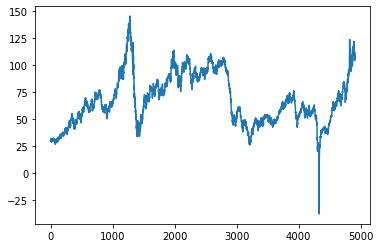

In [6]:
plt.plot(df1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as  np
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
df1.shape

(4906, 1)

In [9]:
df1

array([[0.37360595],
       [0.37338727],
       [0.36999781],
       ...,
       [0.80587142],
       [0.7838946 ],
       [0.78198119]])

###  spliting the data

In [10]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
train_data.shape,test_data.shape

((3188, 1), (1718, 1))

In [12]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(3087, 100)
(3087,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(1617, 100)
(1617,)


(None, None)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


Here we used 3 hiden layers and input_shape 100 for first hidden layer

In [20]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
49/49 [==============================] - 66s 418ms/step - loss: 0.0308 - val_loss: 0.0028
Epoch 2/100
49/49 [==============================] - 10s 206ms/step - loss: 0.0015 - val_loss: 7.3137e-04
Epoch 3/100
49/49 [==============================] - 10s 211ms/step - loss: 6.6485e-04 - val_loss: 5.7952e-04
Epoch 4/100
49/49 [==============================] - 10s 204ms/step - loss: 5.9197e-04 - val_loss: 5.7288e-04
Epoch 5/100
49/49 [==============================] - 10s 206ms/step - loss: 5.8134e-04 - val_loss: 5.4420e-04
Epoch 6/100
49/49 [==============================] - 10s 212ms/step - loss: 5.6684e-04 - val_loss: 5.2102e-04
Epoch 7/100
49/49 [==============================] - 11s 217ms/step - loss: 5.5053e-04 - val_loss: 6.2875e-04
Epoch 8/100
49/49 [==============================] - 10s 203ms/step - loss: 4.8805e-04 - val_loss: 5.4497e-04
Epoch 9/100
49/49 [==============================] - 10s 202ms/step - loss: 4.7421e-04 - val_loss: 4.6899e-04
Epoch 10/100
49/49 [==

49/49 [==============================] - 7s 153ms/step - loss: 1.3194e-04 - val_loss: 4.5268e-04
Epoch 76/100
49/49 [==============================] - 6s 122ms/step - loss: 2.1608e-04 - val_loss: 1.8303e-04
Epoch 77/100
49/49 [==============================] - 5s 112ms/step - loss: 1.1495e-04 - val_loss: 1.7220e-04
Epoch 78/100
49/49 [==============================] - 5s 93ms/step - loss: 1.1348e-04 - val_loss: 1.6658e-04
Epoch 79/100
49/49 [==============================] - 4s 86ms/step - loss: 1.2022e-04 - val_loss: 1.7218e-04
Epoch 80/100
49/49 [==============================] - 4s 91ms/step - loss: 1.1719e-04 - val_loss: 1.6257e-04
Epoch 81/100
49/49 [==============================] - 4s 87ms/step - loss: 1.1044e-04 - val_loss: 2.3308e-04
Epoch 82/100
49/49 [==============================] - 4s 91ms/step - loss: 1.3609e-04 - val_loss: 1.7073e-04
Epoch 83/100
49/49 [==============================] - 5s 103ms/step - loss: 1.1042e-04 - val_loss: 2.0637e-04
Epoch 84/100
49/49 [========

In [21]:
import tensorflow as tf

In [22]:
tf.__version__

'2.8.0'

In [23]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [24]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

78.60678638485616

In [26]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

61.66041880613209

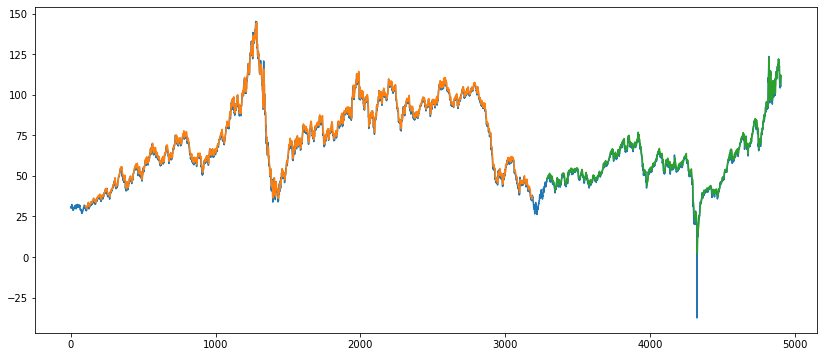

In [27]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(14,6))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In above plot blue line determine the actual values and orrenge line determine the predicted value for train data and green line determine the predicted values for test data. Its giving better results we finalize the LSTM model

In [28]:
len(test_data)

1718

In [29]:
x_input=test_data[1618:].reshape(1,-1)
x_input.shape

(1, 100)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [31]:
temp_input

[0.7177454624972667,
 0.7073584080472339,
 0.7035862672206429,
 0.7065930461403893,
 0.7122239230264598,
 0.7105838617975072,
 0.7092171441067133,
 0.7130986223485678,
 0.7064290400174941,
 0.7290072162694075,
 0.7710474524382245,
 0.8103542532254538,
 0.7943363218893507,
 0.8381259567023837,
 0.8584627159413952,
 0.8819702602230485,
 0.7999671987754211,
 0.7853159851301116,
 0.8034113273562213,
 0.7688607041329544,
 0.7329433632188935,
 0.7252897441504484,
 0.7686966980100591,
 0.7780997157227204,
 0.8186638967854801,
 0.8166958233107371,
 0.8340258036300023,
 0.8198666083533787,
 0.8283949267439319,
 0.7849879728843211,
 0.7755849551716598,
 0.7951563525038269,
 0.7539361469494862,
 0.7484146074786793,
 0.7703367592390117,
 0.7631204898316204,
 0.7317953203586268,
 0.7307019462059918,
 0.7428930680078724,
 0.721189591078067,
 0.7556855455937023,
 0.7756396238792916,
 0.7904001749398646,
 0.7972884321014652,
 0.7664006122895256,
 0.7674393177345289,
 0.773124863328231,
 0.763721845615

In [32]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.78553176]
101
1 day input [0.70735841 0.70358627 0.70659305 0.71222392 0.71058386 0.70921714
 0.71309862 0.70642904 0.72900722 0.77104745 0.81035425 0.79433632
 0.83812596 0.85846272 0.88197026 0.7999672  0.78531599 0.80341133
 0.7688607  0.73294336 0.72528974 0.7686967  0.77809972 0.8186639
 0.81669582 0.8340258  0.81986661 0.82839493 0.78498797 0.77558496
 0.79515635 0.75393615 0.74841461 0.77033676 0.76312049 0.73179532
 0.73070195 0.74289307 0.72118959 0.75568555 0.77563962 0.79040017
 0.79728843 0.76640061 0.76743932 0.77312486 0.76372185 0.74442379
 0.7616991  0.7634485  0.78170785 0.77804505 0.78066914 0.76558058
 0.79510168 0.79756178 0.80581675 0.76929805 0.75109337 0.78362126
 0.78591734 0.8097529  0.83003499 0.82019462 0.80483271 0.81915592
 0.82473212 0.80865952 0.80581675 0.8088782  0.82943363 0.83479117
 0.83774328 0.84867702 0.83260442 0.83582987 0.84463153 0.85556527
 0.85354253 0.85851738 0.87327794 0.86999781 0.86540564 0.86682703
 0.85589329 0.83610321 0.84856768 

12 day output [[0.81486297]]
13 day input [0.83812596 0.85846272 0.88197026 0.7999672  0.78531599 0.80341133
 0.7688607  0.73294336 0.72528974 0.7686967  0.77809972 0.8186639
 0.81669582 0.8340258  0.81986661 0.82839493 0.78498797 0.77558496
 0.79515635 0.75393615 0.74841461 0.77033676 0.76312049 0.73179532
 0.73070195 0.74289307 0.72118959 0.75568555 0.77563962 0.79040017
 0.79728843 0.76640061 0.76743932 0.77312486 0.76372185 0.74442379
 0.7616991  0.7634485  0.78170785 0.77804505 0.78066914 0.76558058
 0.79510168 0.79756178 0.80581675 0.76929805 0.75109337 0.78362126
 0.78591734 0.8097529  0.83003499 0.82019462 0.80483271 0.81915592
 0.82473212 0.80865952 0.80581675 0.8088782  0.82943363 0.83479117
 0.83774328 0.84867702 0.83260442 0.83582987 0.84463153 0.85556527
 0.85354253 0.85851738 0.87327794 0.86999781 0.86540564 0.86682703
 0.85589329 0.83610321 0.84856768 0.80466871 0.80127925 0.80073256
 0.8106276  0.78624535 0.77574896 0.79406298 0.80472338 0.81669582
 0.80587142 0.7838946

24 day output [[0.82270604]]
25 day input [0.81669582 0.8340258  0.81986661 0.82839493 0.78498797 0.77558496
 0.79515635 0.75393615 0.74841461 0.77033676 0.76312049 0.73179532
 0.73070195 0.74289307 0.72118959 0.75568555 0.77563962 0.79040017
 0.79728843 0.76640061 0.76743932 0.77312486 0.76372185 0.74442379
 0.7616991  0.7634485  0.78170785 0.77804505 0.78066914 0.76558058
 0.79510168 0.79756178 0.80581675 0.76929805 0.75109337 0.78362126
 0.78591734 0.8097529  0.83003499 0.82019462 0.80483271 0.81915592
 0.82473212 0.80865952 0.80581675 0.8088782  0.82943363 0.83479117
 0.83774328 0.84867702 0.83260442 0.83582987 0.84463153 0.85556527
 0.85354253 0.85851738 0.87327794 0.86999781 0.86540564 0.86682703
 0.85589329 0.83610321 0.84856768 0.80466871 0.80127925 0.80073256
 0.8106276  0.78624535 0.77574896 0.79406298 0.80472338 0.81669582
 0.80587142 0.7838946  0.78198119 0.78553176 0.78868252 0.7931962
 0.79749107 0.80121613 0.80424106 0.8066268  0.80852729 0.81010205
 0.81147307 0.8127099

In [33]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [34]:
len(df1)

4906

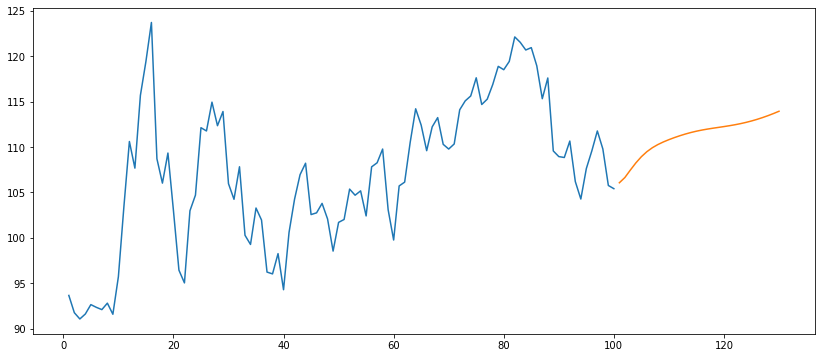

In [35]:
plt.figure(figsize=(14,6))
plt.plot(day_new,scaler.inverse_transform(df1[4806:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

The orenge line shows the forecasted values for next 30 days based on previous 100 days records.

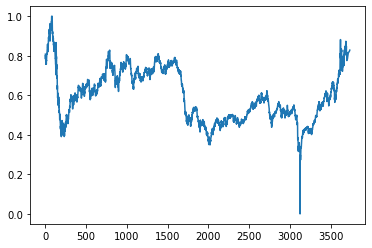

In [36]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])
plt.show()

In [37]:
df3=scaler.inverse_transform(df3).tolist()

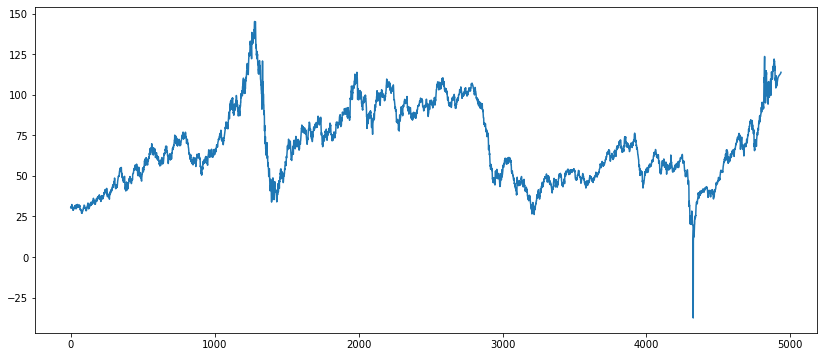

In [38]:
plt.figure(figsize=(14,6))
plt.plot(df3)
plt.show()

### Forecast for 1 year

In [39]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<365):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.77558496 0.79515635 0.75393615 0.74841461 0.77033676 0.76312049
 0.73179532 0.73070195 0.74289307 0.72118959 0.75568555 0.77563962
 0.79040017 0.79728843 0.76640061 0.76743932 0.77312486 0.76372185
 0.74442379 0.7616991  0.7634485  0.78170785 0.77804505 0.78066914
 0.76558058 0.79510168 0.79756178 0.80581675 0.76929805 0.75109337
 0.78362126 0.78591734 0.8097529  0.83003499 0.82019462 0.80483271
 0.81915592 0.82473212 0.80865952 0.80581675 0.8088782  0.82943363
 0.83479117 0.83774328 0.84867702 0.83260442 0.83582987 0.84463153
 0.85556527 0.85354253 0.85851738 0.87327794 0.86999781 0.86540564
 0.86682703 0.85589329 0.83610321 0.84856768 0.80466871 0.80127925
 0.80073256 0.8106276  0.78624535 0.77574896 0.79406298 0.80472338
 0.81669582 0.80587142 0.7838946  0.78198119 0.78553176 0.78868252
 0.7931962  0.79749107 0.80121613 0.80424106 0.8066268  0.80852729
 0.81010205 0.81147307 0.81270993 0.81383979 0.81486297 0.81577182
 0.81656259 0.81724256 0.81782973 0.8183521  0.818

11 day output [[0.84880704]]
12 day input [0.79040017 0.79728843 0.76640061 0.76743932 0.77312486 0.76372185
 0.74442379 0.7616991  0.7634485  0.78170785 0.77804505 0.78066914
 0.76558058 0.79510168 0.79756178 0.80581675 0.76929805 0.75109337
 0.78362126 0.78591734 0.8097529  0.83003499 0.82019462 0.80483271
 0.81915592 0.82473212 0.80865952 0.80581675 0.8088782  0.82943363
 0.83479117 0.83774328 0.84867702 0.83260442 0.83582987 0.84463153
 0.85556527 0.85354253 0.85851738 0.87327794 0.86999781 0.86540564
 0.86682703 0.85589329 0.83610321 0.84856768 0.80466871 0.80127925
 0.80073256 0.8106276  0.78624535 0.77574896 0.79406298 0.80472338
 0.81669582 0.80587142 0.7838946  0.78198119 0.78553176 0.78868252
 0.7931962  0.79749107 0.80121613 0.80424106 0.8066268  0.80852729
 0.81010205 0.81147307 0.81270993 0.81383979 0.81486297 0.81577182
 0.81656259 0.81724256 0.81782973 0.8183521  0.81884205 0.81933349
 0.81985706 0.8204388  0.82109845 0.82185119 0.82270604 0.82366788
 0.82473737 0.825912

24 day output [[0.87042004]]
25 day input [0.79510168 0.79756178 0.80581675 0.76929805 0.75109337 0.78362126
 0.78591734 0.8097529  0.83003499 0.82019462 0.80483271 0.81915592
 0.82473212 0.80865952 0.80581675 0.8088782  0.82943363 0.83479117
 0.83774328 0.84867702 0.83260442 0.83582987 0.84463153 0.85556527
 0.85354253 0.85851738 0.87327794 0.86999781 0.86540564 0.86682703
 0.85589329 0.83610321 0.84856768 0.80466871 0.80127925 0.80073256
 0.8106276  0.78624535 0.77574896 0.79406298 0.80472338 0.81669582
 0.80587142 0.7838946  0.78198119 0.78553176 0.78868252 0.7931962
 0.79749107 0.80121613 0.80424106 0.8066268  0.80852729 0.81010205
 0.81147307 0.81270993 0.81383979 0.81486297 0.81577182 0.81656259
 0.81724256 0.81782973 0.8183521  0.81884205 0.81933349 0.81985706
 0.8204388  0.82109845 0.82185119 0.82270604 0.82366788 0.82473737
 0.82591259 0.82718819 0.82855761 0.83001208 0.83154219 0.83313733
 0.83478737 0.83648127 0.83820873 0.83996028 0.8417269  0.84350085
 0.84527558 0.8470457

37 day input [0.82473212 0.80865952 0.80581675 0.8088782  0.82943363 0.83479117
 0.83774328 0.84867702 0.83260442 0.83582987 0.84463153 0.85556527
 0.85354253 0.85851738 0.87327794 0.86999781 0.86540564 0.86682703
 0.85589329 0.83610321 0.84856768 0.80466871 0.80127925 0.80073256
 0.8106276  0.78624535 0.77574896 0.79406298 0.80472338 0.81669582
 0.80587142 0.7838946  0.78198119 0.78553176 0.78868252 0.7931962
 0.79749107 0.80121613 0.80424106 0.8066268  0.80852729 0.81010205
 0.81147307 0.81270993 0.81383979 0.81486297 0.81577182 0.81656259
 0.81724256 0.81782973 0.8183521  0.81884205 0.81933349 0.81985706
 0.8204388  0.82109845 0.82185119 0.82270604 0.82366788 0.82473737
 0.82591259 0.82718819 0.82855761 0.83001208 0.83154219 0.83313733
 0.83478737 0.83648127 0.83820873 0.83996028 0.8417269  0.84350085
 0.84527558 0.84704572 0.84880704 0.85055637 0.85229146 0.8540116
 0.85571551 0.85740352 0.8590765  0.8607344  0.86237884 0.86401027
 0.86562979 0.86723751 0.8688345  0.87042004 0.8719

49 day output [[0.90284324]]
50 day input [0.85851738 0.87327794 0.86999781 0.86540564 0.86682703 0.85589329
 0.83610321 0.84856768 0.80466871 0.80127925 0.80073256 0.8106276
 0.78624535 0.77574896 0.79406298 0.80472338 0.81669582 0.80587142
 0.7838946  0.78198119 0.78553176 0.78868252 0.7931962  0.79749107
 0.80121613 0.80424106 0.8066268  0.80852729 0.81010205 0.81147307
 0.81270993 0.81383979 0.81486297 0.81577182 0.81656259 0.81724256
 0.81782973 0.8183521  0.81884205 0.81933349 0.81985706 0.8204388
 0.82109845 0.82185119 0.82270604 0.82366788 0.82473737 0.82591259
 0.82718819 0.82855761 0.83001208 0.83154219 0.83313733 0.83478737
 0.83648127 0.83820873 0.83996028 0.8417269  0.84350085 0.84527558
 0.84704572 0.84880704 0.85055637 0.85229146 0.8540116  0.85571551
 0.85740352 0.8590765  0.8607344  0.86237884 0.86401027 0.86562979
 0.86723751 0.8688345  0.87042004 0.87199485 0.87355763 0.87510812
 0.87664491 0.8781662  0.8796711  0.8811574  0.88262361 0.88406777
 0.88548785 0.88688225

61 day output [[0.91018033]]
62 day input [0.78624535 0.77574896 0.79406298 0.80472338 0.81669582 0.80587142
 0.7838946  0.78198119 0.78553176 0.78868252 0.7931962  0.79749107
 0.80121613 0.80424106 0.8066268  0.80852729 0.81010205 0.81147307
 0.81270993 0.81383979 0.81486297 0.81577182 0.81656259 0.81724256
 0.81782973 0.8183521  0.81884205 0.81933349 0.81985706 0.8204388
 0.82109845 0.82185119 0.82270604 0.82366788 0.82473737 0.82591259
 0.82718819 0.82855761 0.83001208 0.83154219 0.83313733 0.83478737
 0.83648127 0.83820873 0.83996028 0.8417269  0.84350085 0.84527558
 0.84704572 0.84880704 0.85055637 0.85229146 0.8540116  0.85571551
 0.85740352 0.8590765  0.8607344  0.86237884 0.86401027 0.86562979
 0.86723751 0.8688345  0.87042004 0.87199485 0.87355763 0.87510812
 0.87664491 0.8781662  0.8796711  0.8811574  0.88262361 0.88406777
 0.88548785 0.88688225 0.88824862 0.88958538 0.89089102 0.89216393
 0.89340258 0.89460576 0.8957724  0.89690131 0.89799213 0.89904326
 0.90005451 0.9010252

73 day output [[0.91138816]]
74 day input [0.80121613 0.80424106 0.8066268  0.80852729 0.81010205 0.81147307
 0.81270993 0.81383979 0.81486297 0.81577182 0.81656259 0.81724256
 0.81782973 0.8183521  0.81884205 0.81933349 0.81985706 0.8204388
 0.82109845 0.82185119 0.82270604 0.82366788 0.82473737 0.82591259
 0.82718819 0.82855761 0.83001208 0.83154219 0.83313733 0.83478737
 0.83648127 0.83820873 0.83996028 0.8417269  0.84350085 0.84527558
 0.84704572 0.84880704 0.85055637 0.85229146 0.8540116  0.85571551
 0.85740352 0.8590765  0.8607344  0.86237884 0.86401027 0.86562979
 0.86723751 0.8688345  0.87042004 0.87199485 0.87355763 0.87510812
 0.87664491 0.8781662  0.8796711  0.8811574  0.88262361 0.88406777
 0.88548785 0.88688225 0.88824862 0.88958538 0.89089102 0.89216393
 0.89340258 0.89460576 0.8957724  0.89690131 0.89799213 0.89904326
 0.90005451 0.90102524 0.90195495 0.90284324 0.90368956 0.90449357
 0.90525562 0.90597486 0.9066515  0.90728539 0.90787625 0.90842372
 0.90892786 0.9093887

83 day output [[0.90818703]]
84 day input [0.81656259 0.81724256 0.81782973 0.8183521  0.81884205 0.81933349
 0.81985706 0.8204388  0.82109845 0.82185119 0.82270604 0.82366788
 0.82473737 0.82591259 0.82718819 0.82855761 0.83001208 0.83154219
 0.83313733 0.83478737 0.83648127 0.83820873 0.83996028 0.8417269
 0.84350085 0.84527558 0.84704572 0.84880704 0.85055637 0.85229146
 0.8540116  0.85571551 0.85740352 0.8590765  0.8607344  0.86237884
 0.86401027 0.86562979 0.86723751 0.8688345  0.87042004 0.87199485
 0.87355763 0.87510812 0.87664491 0.8781662  0.8796711  0.8811574
 0.88262361 0.88406777 0.88548785 0.88688225 0.88824862 0.88958538
 0.89089102 0.89216393 0.89340258 0.89460576 0.8957724  0.89690131
 0.89799213 0.89904326 0.90005451 0.90102524 0.90195495 0.90284324
 0.90368956 0.90449357 0.90525562 0.90597486 0.9066515  0.90728539
 0.90787625 0.90842372 0.90892786 0.90938872 0.90980619 0.91018033
 0.91051173 0.91080004 0.91104567 0.91124892 0.91140985 0.91152889
 0.91160649 0.91164303

94 day output [[0.9012728]]
95 day input [0.82366788 0.82473737 0.82591259 0.82718819 0.82855761 0.83001208
 0.83154219 0.83313733 0.83478737 0.83648127 0.83820873 0.83996028
 0.8417269  0.84350085 0.84527558 0.84704572 0.84880704 0.85055637
 0.85229146 0.8540116  0.85571551 0.85740352 0.8590765  0.8607344
 0.86237884 0.86401027 0.86562979 0.86723751 0.8688345  0.87042004
 0.87199485 0.87355763 0.87510812 0.87664491 0.8781662  0.8796711
 0.8811574  0.88262361 0.88406777 0.88548785 0.88688225 0.88824862
 0.88958538 0.89089102 0.89216393 0.89340258 0.89460576 0.8957724
 0.89690131 0.89799213 0.89904326 0.90005451 0.90102524 0.90195495
 0.90284324 0.90368956 0.90449357 0.90525562 0.90597486 0.9066515
 0.90728539 0.90787625 0.90842372 0.90892786 0.90938872 0.90980619
 0.91018033 0.91051173 0.91080004 0.91104567 0.91124892 0.91140985
 0.91152889 0.91160649 0.91164303 0.91163892 0.91159451 0.91151083
 0.91138816 0.91122758 0.91102904 0.9107939  0.91052306 0.91021645
 0.90987575 0.90950155 0.

104 day output [[0.89300495]]
105 day input [0.83820873 0.83996028 0.8417269  0.84350085 0.84527558 0.84704572
 0.84880704 0.85055637 0.85229146 0.8540116  0.85571551 0.85740352
 0.8590765  0.8607344  0.86237884 0.86401027 0.86562979 0.86723751
 0.8688345  0.87042004 0.87199485 0.87355763 0.87510812 0.87664491
 0.8781662  0.8796711  0.8811574  0.88262361 0.88406777 0.88548785
 0.88688225 0.88824862 0.88958538 0.89089102 0.89216393 0.89340258
 0.89460576 0.8957724  0.89690131 0.89799213 0.89904326 0.90005451
 0.90102524 0.90195495 0.90284324 0.90368956 0.90449357 0.90525562
 0.90597486 0.9066515  0.90728539 0.90787625 0.90842372 0.90892786
 0.90938872 0.90980619 0.91018033 0.91051173 0.91080004 0.91104567
 0.91124892 0.91140985 0.91152889 0.91160649 0.91164303 0.91163892
 0.91159451 0.91151083 0.91138816 0.91122758 0.91102904 0.9107939
 0.91052306 0.91021645 0.90987575 0.90950155 0.90909487 0.90865624
 0.90818703 0.9076879  0.90715963 0.90660357 0.9060207  0.90541184
 0.90477818 0.90412

114 day output [[0.8839417]]
115 day input [0.85571551 0.85740352 0.8590765  0.8607344  0.86237884 0.86401027
 0.86562979 0.86723751 0.8688345  0.87042004 0.87199485 0.87355763
 0.87510812 0.87664491 0.8781662  0.8796711  0.8811574  0.88262361
 0.88406777 0.88548785 0.88688225 0.88824862 0.88958538 0.89089102
 0.89216393 0.89340258 0.89460576 0.8957724  0.89690131 0.89799213
 0.89904326 0.90005451 0.90102524 0.90195495 0.90284324 0.90368956
 0.90449357 0.90525562 0.90597486 0.9066515  0.90728539 0.90787625
 0.90842372 0.90892786 0.90938872 0.90980619 0.91018033 0.91051173
 0.91080004 0.91104567 0.91124892 0.91140985 0.91152889 0.91160649
 0.91164303 0.91163892 0.91159451 0.91151083 0.91138816 0.91122758
 0.91102904 0.9107939  0.91052306 0.91021645 0.90987575 0.90950155
 0.90909487 0.90865624 0.90818703 0.9076879  0.90715963 0.90660357
 0.9060207  0.90541184 0.90477818 0.90412068 0.90344042 0.90273827
 0.90201539 0.90127277 0.90051192 0.89973325 0.89893866 0.89812863
 0.89730412 0.89646

124 day output [[0.87507516]]
125 day input [0.87199485 0.87355763 0.87510812 0.87664491 0.8781662  0.8796711
 0.8811574  0.88262361 0.88406777 0.88548785 0.88688225 0.88824862
 0.88958538 0.89089102 0.89216393 0.89340258 0.89460576 0.8957724
 0.89690131 0.89799213 0.89904326 0.90005451 0.90102524 0.90195495
 0.90284324 0.90368956 0.90449357 0.90525562 0.90597486 0.9066515
 0.90728539 0.90787625 0.90842372 0.90892786 0.90938872 0.90980619
 0.91018033 0.91051173 0.91080004 0.91104567 0.91124892 0.91140985
 0.91152889 0.91160649 0.91164303 0.91163892 0.91159451 0.91151083
 0.91138816 0.91122758 0.91102904 0.9107939  0.91052306 0.91021645
 0.90987575 0.90950155 0.90909487 0.90865624 0.90818703 0.9076879
 0.90715963 0.90660357 0.9060207  0.90541184 0.90477818 0.90412068
 0.90344042 0.90273827 0.90201539 0.90127277 0.90051192 0.89973325
 0.89893866 0.89812863 0.89730412 0.89646649 0.89561653 0.89475578
 0.89388484 0.89300495 0.89211714 0.8912226  0.89032227 0.88941711
 0.88850832 0.88759679

135 day output [[0.8665594]]
136 day input [0.88824862 0.88958538 0.89089102 0.89216393 0.89340258 0.89460576
 0.8957724  0.89690131 0.89799213 0.89904326 0.90005451 0.90102524
 0.90195495 0.90284324 0.90368956 0.90449357 0.90525562 0.90597486
 0.9066515  0.90728539 0.90787625 0.90842372 0.90892786 0.90938872
 0.90980619 0.91018033 0.91051173 0.91080004 0.91104567 0.91124892
 0.91140985 0.91152889 0.91160649 0.91164303 0.91163892 0.91159451
 0.91151083 0.91138816 0.91122758 0.91102904 0.9107939  0.91052306
 0.91021645 0.90987575 0.90950155 0.90909487 0.90865624 0.90818703
 0.9076879  0.90715963 0.90660357 0.9060207  0.90541184 0.90477818
 0.90412068 0.90344042 0.90273827 0.90201539 0.90127277 0.90051192
 0.89973325 0.89893866 0.89812863 0.89730412 0.89646649 0.89561653
 0.89475578 0.89388484 0.89300495 0.89211714 0.8912226  0.89032227
 0.88941711 0.88850832 0.88759679 0.88668317 0.88576883 0.88485497
 0.88394171 0.88303107 0.88212341 0.88121939 0.88032019 0.87942672
 0.87854004 0.87766

145 day output [[0.8606493]]
146 day input [0.90005451 0.90102524 0.90195495 0.90284324 0.90368956 0.90449357
 0.90525562 0.90597486 0.9066515  0.90728539 0.90787625 0.90842372
 0.90892786 0.90938872 0.90980619 0.91018033 0.91051173 0.91080004
 0.91104567 0.91124892 0.91140985 0.91152889 0.91160649 0.91164303
 0.91163892 0.91159451 0.91151083 0.91138816 0.91122758 0.91102904
 0.9107939  0.91052306 0.91021645 0.90987575 0.90950155 0.90909487
 0.90865624 0.90818703 0.9076879  0.90715963 0.90660357 0.9060207
 0.90541184 0.90477818 0.90412068 0.90344042 0.90273827 0.90201539
 0.90127277 0.90051192 0.89973325 0.89893866 0.89812863 0.89730412
 0.89646649 0.89561653 0.89475578 0.89388484 0.89300495 0.89211714
 0.8912226  0.89032227 0.88941711 0.88850832 0.88759679 0.88668317
 0.88576883 0.88485497 0.88394171 0.88303107 0.88212341 0.88121939
 0.88032019 0.87942672 0.87854004 0.87766069 0.87678945 0.87592739
 0.87507516 0.87423366 0.87340313 0.87258536 0.87178016 0.87098819
 0.87021071 0.869448

155 day output [[0.8569098]]
156 day input [0.90787625 0.90842372 0.90892786 0.90938872 0.90980619 0.91018033
 0.91051173 0.91080004 0.91104567 0.91124892 0.91140985 0.91152889
 0.91160649 0.91164303 0.91163892 0.91159451 0.91151083 0.91138816
 0.91122758 0.91102904 0.9107939  0.91052306 0.91021645 0.90987575
 0.90950155 0.90909487 0.90865624 0.90818703 0.9076879  0.90715963
 0.90660357 0.9060207  0.90541184 0.90477818 0.90412068 0.90344042
 0.90273827 0.90201539 0.90127277 0.90051192 0.89973325 0.89893866
 0.89812863 0.89730412 0.89646649 0.89561653 0.89475578 0.89388484
 0.89300495 0.89211714 0.8912226  0.89032227 0.88941711 0.88850832
 0.88759679 0.88668317 0.88576883 0.88485497 0.88394171 0.88303107
 0.88212341 0.88121939 0.88032019 0.87942672 0.87854004 0.87766069
 0.87678945 0.87592739 0.87507516 0.87423366 0.87340313 0.87258536
 0.87178016 0.87098819 0.87021071 0.8694483  0.86870128 0.86797053
 0.8672564  0.86655939 0.86588049 0.86521977 0.86457807 0.86395556
 0.86335289 0.86277

165 day output [[0.85550094]]
166 day input [0.91140985 0.91152889 0.91160649 0.91164303 0.91163892 0.91159451
 0.91151083 0.91138816 0.91122758 0.91102904 0.9107939  0.91052306
 0.91021645 0.90987575 0.90950155 0.90909487 0.90865624 0.90818703
 0.9076879  0.90715963 0.90660357 0.9060207  0.90541184 0.90477818
 0.90412068 0.90344042 0.90273827 0.90201539 0.90127277 0.90051192
 0.89973325 0.89893866 0.89812863 0.89730412 0.89646649 0.89561653
 0.89475578 0.89388484 0.89300495 0.89211714 0.8912226  0.89032227
 0.88941711 0.88850832 0.88759679 0.88668317 0.88576883 0.88485497
 0.88394171 0.88303107 0.88212341 0.88121939 0.88032019 0.87942672
 0.87854004 0.87766069 0.87678945 0.87592739 0.87507516 0.87423366
 0.87340313 0.87258536 0.87178016 0.87098819 0.87021071 0.8694483
 0.86870128 0.86797053 0.8672564  0.86655939 0.86588049 0.86521977
 0.86457807 0.86395556 0.86335289 0.86277038 0.86220837 0.86166739
 0.86114752 0.86064929 0.86017311 0.85971904 0.85928744 0.85887849
 0.85849249 0.85812

175 day output [[0.85633487]]
176 day input [0.9107939  0.91052306 0.91021645 0.90987575 0.90950155 0.90909487
 0.90865624 0.90818703 0.9076879  0.90715963 0.90660357 0.9060207
 0.90541184 0.90477818 0.90412068 0.90344042 0.90273827 0.90201539
 0.90127277 0.90051192 0.89973325 0.89893866 0.89812863 0.89730412
 0.89646649 0.89561653 0.89475578 0.89388484 0.89300495 0.89211714
 0.8912226  0.89032227 0.88941711 0.88850832 0.88759679 0.88668317
 0.88576883 0.88485497 0.88394171 0.88303107 0.88212341 0.88121939
 0.88032019 0.87942672 0.87854004 0.87766069 0.87678945 0.87592739
 0.87507516 0.87423366 0.87340313 0.87258536 0.87178016 0.87098819
 0.87021071 0.8694483  0.86870128 0.86797053 0.8672564  0.86655939
 0.86588049 0.86521977 0.86457807 0.86395556 0.86335289 0.86277038
 0.86220837 0.86166739 0.86114752 0.86064929 0.86017311 0.85971904
 0.85928744 0.85887849 0.85849249 0.85812944 0.85778952 0.8574729
 0.85717982 0.85690981 0.85666388 0.85644132 0.85624212 0.85606658
 0.85591453 0.855785

183 day output [[0.8584194]]
184 day input [0.9076879  0.90715963 0.90660357 0.9060207  0.90541184 0.90477818
 0.90412068 0.90344042 0.90273827 0.90201539 0.90127277 0.90051192
 0.89973325 0.89893866 0.89812863 0.89730412 0.89646649 0.89561653
 0.89475578 0.89388484 0.89300495 0.89211714 0.8912226  0.89032227
 0.88941711 0.88850832 0.88759679 0.88668317 0.88576883 0.88485497
 0.88394171 0.88303107 0.88212341 0.88121939 0.88032019 0.87942672
 0.87854004 0.87766069 0.87678945 0.87592739 0.87507516 0.87423366
 0.87340313 0.87258536 0.87178016 0.87098819 0.87021071 0.8694483
 0.86870128 0.86797053 0.8672564  0.86655939 0.86588049 0.86521977
 0.86457807 0.86395556 0.86335289 0.86277038 0.86220837 0.86166739
 0.86114752 0.86064929 0.86017311 0.85971904 0.85928744 0.85887849
 0.85849249 0.85812944 0.85778952 0.8574729  0.85717982 0.85690981
 0.85666388 0.85644132 0.85624212 0.85606658 0.85591453 0.85578567
 0.85567993 0.85559738 0.85553777 0.85550094 0.85548675 0.85549521
 0.85552573 0.855578

 0.85985762 0.86025298 0.86066139 0.86108255]
191 day output [[0.86151576]]
192 day input [0.90273827 0.90201539 0.90127277 0.90051192 0.89973325 0.89893866
 0.89812863 0.89730412 0.89646649 0.89561653 0.89475578 0.89388484
 0.89300495 0.89211714 0.8912226  0.89032227 0.88941711 0.88850832
 0.88759679 0.88668317 0.88576883 0.88485497 0.88394171 0.88303107
 0.88212341 0.88121939 0.88032019 0.87942672 0.87854004 0.87766069
 0.87678945 0.87592739 0.87507516 0.87423366 0.87340313 0.87258536
 0.87178016 0.87098819 0.87021071 0.8694483  0.86870128 0.86797053
 0.8672564  0.86655939 0.86588049 0.86521977 0.86457807 0.86395556
 0.86335289 0.86277038 0.86220837 0.86166739 0.86114752 0.86064929
 0.86017311 0.85971904 0.85928744 0.85887849 0.85849249 0.85812944
 0.85778952 0.8574729  0.85717982 0.85690981 0.85666388 0.85644132
 0.85624212 0.85606658 0.85591453 0.85578567 0.85567993 0.85559738
 0.85553777 0.85550094 0.85548675 0.85549521 0.85552573 0.85557818
 0.85565209 0.8557474  0.85586375 0.856

 0.86483228 0.86534005 0.86585414 0.86637449]
202 day output [[0.8668999]]
203 day input [0.89388484 0.89300495 0.89211714 0.8912226  0.89032227 0.88941711
 0.88850832 0.88759679 0.88668317 0.88576883 0.88485497 0.88394171
 0.88303107 0.88212341 0.88121939 0.88032019 0.87942672 0.87854004
 0.87766069 0.87678945 0.87592739 0.87507516 0.87423366 0.87340313
 0.87258536 0.87178016 0.87098819 0.87021071 0.8694483  0.86870128
 0.86797053 0.8672564  0.86655939 0.86588049 0.86521977 0.86457807
 0.86395556 0.86335289 0.86277038 0.86220837 0.86166739 0.86114752
 0.86064929 0.86017311 0.85971904 0.85928744 0.85887849 0.85849249
 0.85812944 0.85778952 0.8574729  0.85717982 0.85690981 0.85666388
 0.85644132 0.85624212 0.85606658 0.85591453 0.85578567 0.85567993
 0.85559738 0.85553777 0.85550094 0.85548675 0.85549521 0.85552573
 0.85557818 0.85565209 0.8557474  0.85586375 0.85600084 0.85615784
 0.85633487 0.85653168 0.85674751 0.85698223 0.85723507 0.85750568
 0.85779357 0.85809827 0.85841942 0.8587

213 day output [[0.8728603]]
214 day input [0.88394171 0.88303107 0.88212341 0.88121939 0.88032019 0.87942672
 0.87854004 0.87766069 0.87678945 0.87592739 0.87507516 0.87423366
 0.87340313 0.87258536 0.87178016 0.87098819 0.87021071 0.8694483
 0.86870128 0.86797053 0.8672564  0.86655939 0.86588049 0.86521977
 0.86457807 0.86395556 0.86335289 0.86277038 0.86220837 0.86166739
 0.86114752 0.86064929 0.86017311 0.85971904 0.85928744 0.85887849
 0.85849249 0.85812944 0.85778952 0.8574729  0.85717982 0.85690981
 0.85666388 0.85644132 0.85624212 0.85606658 0.85591453 0.85578567
 0.85567993 0.85559738 0.85553777 0.85550094 0.85548675 0.85549521
 0.85552573 0.85557818 0.85565209 0.8557474  0.85586375 0.85600084
 0.85615784 0.85633487 0.85653168 0.85674751 0.85698223 0.85723507
 0.85750568 0.85779357 0.85809827 0.85841942 0.85875642 0.85910892
 0.85947615 0.85985762 0.86025298 0.86066139 0.86108255 0.86151576
 0.86195999 0.86241508 0.86288029 0.86335534 0.86383975 0.86433202
 0.86483228 0.865340

222 day output [[0.87761456]]
223 day input [0.87592739 0.87507516 0.87423366 0.87340313 0.87258536 0.87178016
 0.87098819 0.87021071 0.8694483  0.86870128 0.86797053 0.8672564
 0.86655939 0.86588049 0.86521977 0.86457807 0.86395556 0.86335289
 0.86277038 0.86220837 0.86166739 0.86114752 0.86064929 0.86017311
 0.85971904 0.85928744 0.85887849 0.85849249 0.85812944 0.85778952
 0.8574729  0.85717982 0.85690981 0.85666388 0.85644132 0.85624212
 0.85606658 0.85591453 0.85578567 0.85567993 0.85559738 0.85553777
 0.85550094 0.85548675 0.85549521 0.85552573 0.85557818 0.85565209
 0.8557474  0.85586375 0.85600084 0.85615784 0.85633487 0.85653168
 0.85674751 0.85698223 0.85723507 0.85750568 0.85779357 0.85809827
 0.85841942 0.85875642 0.85910892 0.85947615 0.85985762 0.86025298
 0.86066139 0.86108255 0.86151576 0.86195999 0.86241508 0.86288029
 0.86335534 0.86383975 0.86433202 0.86483228 0.86534005 0.86585414
 0.86637449 0.86689991 0.86743009 0.86796468 0.8685028  0.86904347
 0.86958671 0.87013

232 day output [[0.8822704]]
233 day input [0.86797053 0.8672564  0.86655939 0.86588049 0.86521977 0.86457807
 0.86395556 0.86335289 0.86277038 0.86220837 0.86166739 0.86114752
 0.86064929 0.86017311 0.85971904 0.85928744 0.85887849 0.85849249
 0.85812944 0.85778952 0.8574729  0.85717982 0.85690981 0.85666388
 0.85644132 0.85624212 0.85606658 0.85591453 0.85578567 0.85567993
 0.85559738 0.85553777 0.85550094 0.85548675 0.85549521 0.85552573
 0.85557818 0.85565209 0.8557474  0.85586375 0.85600084 0.85615784
 0.85633487 0.85653168 0.85674751 0.85698223 0.85723507 0.85750568
 0.85779357 0.85809827 0.85841942 0.85875642 0.85910892 0.85947615
 0.85985762 0.86025298 0.86066139 0.86108255 0.86151576 0.86195999
 0.86241508 0.86288029 0.86335534 0.86383975 0.86433202 0.86483228
 0.86534005 0.86585414 0.86637449 0.86689991 0.86743009 0.86796468
 0.8685028  0.86904347 0.86958671 0.87013149 0.87067735 0.87122369
 0.8717702  0.87231582 0.87286031 0.87340301 0.87394351 0.8744809
 0.87501484 0.875544

240 day output [[0.8852548]]
241 day input [0.86277038 0.86220837 0.86166739 0.86114752 0.86064929 0.86017311
 0.85971904 0.85928744 0.85887849 0.85849249 0.85812944 0.85778952
 0.8574729  0.85717982 0.85690981 0.85666388 0.85644132 0.85624212
 0.85606658 0.85591453 0.85578567 0.85567993 0.85559738 0.85553777
 0.85550094 0.85548675 0.85549521 0.85552573 0.85557818 0.85565209
 0.8557474  0.85586375 0.85600084 0.85615784 0.85633487 0.85653168
 0.85674751 0.85698223 0.85723507 0.85750568 0.85779357 0.85809827
 0.85841942 0.85875642 0.85910892 0.85947615 0.85985762 0.86025298
 0.86066139 0.86108255 0.86151576 0.86195999 0.86241508 0.86288029
 0.86335534 0.86383975 0.86433202 0.86483228 0.86534005 0.86585414
 0.86637449 0.86689991 0.86743009 0.86796468 0.8685028  0.86904347
 0.86958671 0.87013149 0.87067735 0.87122369 0.8717702  0.87231582
 0.87286031 0.87340301 0.87394351 0.8744809  0.87501484 0.87554473
 0.87607032 0.87659055 0.87710547 0.87761456 0.87811667 0.8786121
 0.87909991 0.879579

248 day output [[0.8874247]]
249 day input [0.85887849 0.85849249 0.85812944 0.85778952 0.8574729  0.85717982
 0.85690981 0.85666388 0.85644132 0.85624212 0.85606658 0.85591453
 0.85578567 0.85567993 0.85559738 0.85553777 0.85550094 0.85548675
 0.85549521 0.85552573 0.85557818 0.85565209 0.8557474  0.85586375
 0.85600084 0.85615784 0.85633487 0.85653168 0.85674751 0.85698223
 0.85723507 0.85750568 0.85779357 0.85809827 0.85841942 0.85875642
 0.85910892 0.85947615 0.85985762 0.86025298 0.86066139 0.86108255
 0.86151576 0.86195999 0.86241508 0.86288029 0.86335534 0.86383975
 0.86433202 0.86483228 0.86534005 0.86585414 0.86637449 0.86689991
 0.86743009 0.86796468 0.8685028  0.86904347 0.86958671 0.87013149
 0.87067735 0.87122369 0.8717702  0.87231582 0.87286031 0.87340301
 0.87394351 0.8744809  0.87501484 0.87554473 0.87607032 0.87659055
 0.87710547 0.87761456 0.87811667 0.8786121  0.87909991 0.87957972
 0.88005143 0.88051409 0.88096774 0.88141215 0.88184631 0.8822704
 0.88268369 0.883086

257 day input [0.85644132 0.85624212 0.85606658 0.85591453 0.85578567 0.85567993
 0.85559738 0.85553777 0.85550094 0.85548675 0.85549521 0.85552573
 0.85557818 0.85565209 0.8557474  0.85586375 0.85600084 0.85615784
 0.85633487 0.85653168 0.85674751 0.85698223 0.85723507 0.85750568
 0.85779357 0.85809827 0.85841942 0.85875642 0.85910892 0.85947615
 0.85985762 0.86025298 0.86066139 0.86108255 0.86151576 0.86195999
 0.86241508 0.86288029 0.86335534 0.86383975 0.86433202 0.86483228
 0.86534005 0.86585414 0.86637449 0.86689991 0.86743009 0.86796468
 0.8685028  0.86904347 0.86958671 0.87013149 0.87067735 0.87122369
 0.8717702  0.87231582 0.87286031 0.87340301 0.87394351 0.8744809
 0.87501484 0.87554473 0.87607032 0.87659055 0.87710547 0.87761456
 0.87811667 0.8786121  0.87909991 0.87957972 0.88005143 0.88051409
 0.88096774 0.88141215 0.88184631 0.8822704  0.88268369 0.88308638
 0.88347739 0.88385689 0.88422471 0.88458067 0.88492388 0.8852548
 0.88557279 0.88587737 0.88616914 0.88644749 0.886

265 day output [[0.88908637]]
266 day input [0.85548675 0.85549521 0.85552573 0.85557818 0.85565209 0.8557474
 0.85586375 0.85600084 0.85615784 0.85633487 0.85653168 0.85674751
 0.85698223 0.85723507 0.85750568 0.85779357 0.85809827 0.85841942
 0.85875642 0.85910892 0.85947615 0.85985762 0.86025298 0.86066139
 0.86108255 0.86151576 0.86195999 0.86241508 0.86288029 0.86335534
 0.86383975 0.86433202 0.86483228 0.86534005 0.86585414 0.86637449
 0.86689991 0.86743009 0.86796468 0.8685028  0.86904347 0.86958671
 0.87013149 0.87067735 0.87122369 0.8717702  0.87231582 0.87286031
 0.87340301 0.87394351 0.8744809  0.87501484 0.87554473 0.87607032
 0.87659055 0.87710547 0.87761456 0.87811667 0.8786121  0.87909991
 0.87957972 0.88005143 0.88051409 0.88096774 0.88141215 0.88184631
 0.8822704  0.88268369 0.88308638 0.88347739 0.88385689 0.88422471
 0.88458067 0.88492388 0.8852548  0.88557279 0.88587737 0.88616914
 0.88644749 0.88671225 0.88696361 0.88720101 0.88742471 0.88763458
 0.88783044 0.88801

273 day output [[0.8885386]]
274 day input [0.85615784 0.85633487 0.85653168 0.85674751 0.85698223 0.85723507
 0.85750568 0.85779357 0.85809827 0.85841942 0.85875642 0.85910892
 0.85947615 0.85985762 0.86025298 0.86066139 0.86108255 0.86151576
 0.86195999 0.86241508 0.86288029 0.86335534 0.86383975 0.86433202
 0.86483228 0.86534005 0.86585414 0.86637449 0.86689991 0.86743009
 0.86796468 0.8685028  0.86904347 0.86958671 0.87013149 0.87067735
 0.87122369 0.8717702  0.87231582 0.87286031 0.87340301 0.87394351
 0.8744809  0.87501484 0.87554473 0.87607032 0.87659055 0.87710547
 0.87761456 0.87811667 0.8786121  0.87909991 0.87957972 0.88005143
 0.88051409 0.88096774 0.88141215 0.88184631 0.8822704  0.88268369
 0.88308638 0.88347739 0.88385689 0.88422471 0.88458067 0.88492388
 0.8852548  0.88557279 0.88587737 0.88616914 0.88644749 0.88671225
 0.88696361 0.88720101 0.88742471 0.88763458 0.88783044 0.88801193
 0.88817942 0.88833266 0.88847196 0.88859713 0.88870817 0.88880545
 0.88888848 0.88895

282 day output [[0.88707346]]
283 day input [0.85841942 0.85875642 0.85910892 0.85947615 0.85985762 0.86025298
 0.86066139 0.86108255 0.86151576 0.86195999 0.86241508 0.86288029
 0.86335534 0.86383975 0.86433202 0.86483228 0.86534005 0.86585414
 0.86637449 0.86689991 0.86743009 0.86796468 0.8685028  0.86904347
 0.86958671 0.87013149 0.87067735 0.87122369 0.8717702  0.87231582
 0.87286031 0.87340301 0.87394351 0.8744809  0.87501484 0.87554473
 0.87607032 0.87659055 0.87710547 0.87761456 0.87811667 0.8786121
 0.87909991 0.87957972 0.88005143 0.88051409 0.88096774 0.88141215
 0.88184631 0.8822704  0.88268369 0.88308638 0.88347739 0.88385689
 0.88422471 0.88458067 0.88492388 0.8852548  0.88557279 0.88587737
 0.88616914 0.88644749 0.88671225 0.88696361 0.88720101 0.88742471
 0.88763458 0.88783044 0.88801193 0.88817942 0.88833266 0.88847196
 0.88859713 0.88870817 0.88880545 0.88888848 0.88895762 0.88901299
 0.88905448 0.88908207 0.88909686 0.88909811 0.88908637 0.88906133
 0.88902342 0.88897

290 day output [[0.8851837]]
291 day input [0.86151576 0.86195999 0.86241508 0.86288029 0.86335534 0.86383975
 0.86433202 0.86483228 0.86534005 0.86585414 0.86637449 0.86689991
 0.86743009 0.86796468 0.8685028  0.86904347 0.86958671 0.87013149
 0.87067735 0.87122369 0.8717702  0.87231582 0.87286031 0.87340301
 0.87394351 0.8744809  0.87501484 0.87554473 0.87607032 0.87659055
 0.87710547 0.87761456 0.87811667 0.8786121  0.87909991 0.87957972
 0.88005143 0.88051409 0.88096774 0.88141215 0.88184631 0.8822704
 0.88268369 0.88308638 0.88347739 0.88385689 0.88422471 0.88458067
 0.88492388 0.8852548  0.88557279 0.88587737 0.88616914 0.88644749
 0.88671225 0.88696361 0.88720101 0.88742471 0.88763458 0.88783044
 0.88801193 0.88817942 0.88833266 0.88847196 0.88859713 0.88870817
 0.88880545 0.88888848 0.88895762 0.88901299 0.88905448 0.88908207
 0.88909686 0.88909811 0.88908637 0.88906133 0.88902342 0.888973
 0.88891006 0.88883501 0.88874775 0.88864911 0.8885386  0.88841712
 0.88828456 0.88814133

301 day output [[0.88201296]]
302 day input [0.86689991 0.86743009 0.86796468 0.8685028  0.86904347 0.86958671
 0.87013149 0.87067735 0.87122369 0.8717702  0.87231582 0.87286031
 0.87340301 0.87394351 0.8744809  0.87501484 0.87554473 0.87607032
 0.87659055 0.87710547 0.87761456 0.87811667 0.8786121  0.87909991
 0.87957972 0.88005143 0.88051409 0.88096774 0.88141215 0.88184631
 0.8822704  0.88268369 0.88308638 0.88347739 0.88385689 0.88422471
 0.88458067 0.88492388 0.8852548  0.88557279 0.88587737 0.88616914
 0.88644749 0.88671225 0.88696361 0.88720101 0.88742471 0.88763458
 0.88783044 0.88801193 0.88817942 0.88833266 0.88847196 0.88859713
 0.88870817 0.88880545 0.88888848 0.88895762 0.88901299 0.88905448
 0.88908207 0.88909686 0.88909811 0.88908637 0.88906133 0.88902342
 0.888973   0.88891006 0.88883501 0.88874775 0.88864911 0.8885386
 0.88841712 0.88828456 0.88814133 0.88798773 0.88782394 0.88765049
 0.88746721 0.8872748  0.88707346 0.88686377 0.88664579 0.88641977
 0.88618654 0.88594

311 day output [[0.8789157]]
312 day input [0.87231582 0.87286031 0.87340301 0.87394351 0.8744809  0.87501484
 0.87554473 0.87607032 0.87659055 0.87710547 0.87761456 0.87811667
 0.8786121  0.87909991 0.87957972 0.88005143 0.88051409 0.88096774
 0.88141215 0.88184631 0.8822704  0.88268369 0.88308638 0.88347739
 0.88385689 0.88422471 0.88458067 0.88492388 0.8852548  0.88557279
 0.88587737 0.88616914 0.88644749 0.88671225 0.88696361 0.88720101
 0.88742471 0.88763458 0.88783044 0.88801193 0.88817942 0.88833266
 0.88847196 0.88859713 0.88870817 0.88880545 0.88888848 0.88895762
 0.88901299 0.88905448 0.88908207 0.88909686 0.88909811 0.88908637
 0.88906133 0.88902342 0.888973   0.88891006 0.88883501 0.88874775
 0.88864911 0.8885386  0.88841712 0.88828456 0.88814133 0.88798773
 0.88782394 0.88765049 0.88746721 0.8872748  0.88707346 0.88686377
 0.88664579 0.88641977 0.88618654 0.88594574 0.88569826 0.88544387
 0.88518369 0.8849175  0.88464576 0.88436884 0.88408744 0.8838014
 0.88351136 0.883217

323 day output [[0.8754113]]
324 day input [0.8786121  0.87909991 0.87957972 0.88005143 0.88051409 0.88096774
 0.88141215 0.88184631 0.8822704  0.88268369 0.88308638 0.88347739
 0.88385689 0.88422471 0.88458067 0.88492388 0.8852548  0.88557279
 0.88587737 0.88616914 0.88644749 0.88671225 0.88696361 0.88720101
 0.88742471 0.88763458 0.88783044 0.88801193 0.88817942 0.88833266
 0.88847196 0.88859713 0.88870817 0.88880545 0.88888848 0.88895762
 0.88901299 0.88905448 0.88908207 0.88909686 0.88909811 0.88908637
 0.88906133 0.88902342 0.888973   0.88891006 0.88883501 0.88874775
 0.88864911 0.8885386  0.88841712 0.88828456 0.88814133 0.88798773
 0.88782394 0.88765049 0.88746721 0.8872748  0.88707346 0.88686377
 0.88664579 0.88641977 0.88618654 0.88594574 0.88569826 0.88544387
 0.88518369 0.8849175  0.88464576 0.88436884 0.88408744 0.8838014
 0.88351136 0.88321757 0.88292021 0.88262039 0.88231784 0.88201296
 0.881706   0.88139755 0.88108796 0.88077742 0.88046652 0.8801555
 0.87984437 0.8795338

332 day output [[0.87320584]]
333 day input [0.88268369 0.88308638 0.88347739 0.88385689 0.88422471 0.88458067
 0.88492388 0.8852548  0.88557279 0.88587737 0.88616914 0.88644749
 0.88671225 0.88696361 0.88720101 0.88742471 0.88763458 0.88783044
 0.88801193 0.88817942 0.88833266 0.88847196 0.88859713 0.88870817
 0.88880545 0.88888848 0.88895762 0.88901299 0.88905448 0.88908207
 0.88909686 0.88909811 0.88908637 0.88906133 0.88902342 0.888973
 0.88891006 0.88883501 0.88874775 0.88864911 0.8885386  0.88841712
 0.88828456 0.88814133 0.88798773 0.88782394 0.88765049 0.88746721
 0.8872748  0.88707346 0.88686377 0.88664579 0.88641977 0.88618654
 0.88594574 0.88569826 0.88544387 0.88518369 0.8849175  0.88464576
 0.88436884 0.88408744 0.8838014  0.88351136 0.88321757 0.88292021
 0.88262039 0.88231784 0.88201296 0.881706   0.88139755 0.88108796
 0.88077742 0.88046652 0.8801555  0.87984437 0.87953383 0.87922412
 0.87891573 0.87860882 0.87830359 0.87800008 0.87769932 0.87740111
 0.87710583 0.876813

342 day output [[0.87137777]]
343 day input [0.88616914 0.88644749 0.88671225 0.88696361 0.88720101 0.88742471
 0.88763458 0.88783044 0.88801193 0.88817942 0.88833266 0.88847196
 0.88859713 0.88870817 0.88880545 0.88888848 0.88895762 0.88901299
 0.88905448 0.88908207 0.88909686 0.88909811 0.88908637 0.88906133
 0.88902342 0.888973   0.88891006 0.88883501 0.88874775 0.88864911
 0.8885386  0.88841712 0.88828456 0.88814133 0.88798773 0.88782394
 0.88765049 0.88746721 0.8872748  0.88707346 0.88686377 0.88664579
 0.88641977 0.88618654 0.88594574 0.88569826 0.88544387 0.88518369
 0.8849175  0.88464576 0.88436884 0.88408744 0.8838014  0.88351136
 0.88321757 0.88292021 0.88262039 0.88231784 0.88201296 0.881706
 0.88139755 0.88108796 0.88077742 0.88046652 0.8801555  0.87984437
 0.87953383 0.87922412 0.87891573 0.87860882 0.87830359 0.87800008
 0.87769932 0.87740111 0.87710583 0.87681371 0.8765254  0.87624085
 0.87595999 0.87568349 0.87541127 0.87514436 0.87488222 0.87462538
 0.87437421 0.874128

351 day output [[0.8703858]]
352 day input [0.88817942 0.88833266 0.88847196 0.88859713 0.88870817 0.88880545
 0.88888848 0.88895762 0.88901299 0.88905448 0.88908207 0.88909686
 0.88909811 0.88908637 0.88906133 0.88902342 0.888973   0.88891006
 0.88883501 0.88874775 0.88864911 0.8885386  0.88841712 0.88828456
 0.88814133 0.88798773 0.88782394 0.88765049 0.88746721 0.8872748
 0.88707346 0.88686377 0.88664579 0.88641977 0.88618654 0.88594574
 0.88569826 0.88544387 0.88518369 0.8849175  0.88464576 0.88436884
 0.88408744 0.8838014  0.88351136 0.88321757 0.88292021 0.88262039
 0.88231784 0.88201296 0.881706   0.88139755 0.88108796 0.88077742
 0.88046652 0.8801555  0.87984437 0.87953383 0.87922412 0.87891573
 0.87860882 0.87830359 0.87800008 0.87769932 0.87740111 0.87710583
 0.87681371 0.8765254  0.87624085 0.87595999 0.87568349 0.87541127
 0.87514436 0.87488222 0.87462538 0.87437421 0.87412846 0.87388855
 0.87365478 0.87342697 0.87320584 0.87299114 0.87278324 0.87258208
 0.87238801 0.872201

360 day output [[0.87003857]]
361 day input [0.88905448 0.88908207 0.88909686 0.88909811 0.88908637 0.88906133
 0.88902342 0.888973   0.88891006 0.88883501 0.88874775 0.88864911
 0.8885386  0.88841712 0.88828456 0.88814133 0.88798773 0.88782394
 0.88765049 0.88746721 0.8872748  0.88707346 0.88686377 0.88664579
 0.88641977 0.88618654 0.88594574 0.88569826 0.88544387 0.88518369
 0.8849175  0.88464576 0.88436884 0.88408744 0.8838014  0.88351136
 0.88321757 0.88292021 0.88262039 0.88231784 0.88201296 0.881706
 0.88139755 0.88108796 0.88077742 0.88046652 0.8801555  0.87984437
 0.87953383 0.87922412 0.87891573 0.87860882 0.87830359 0.87800008
 0.87769932 0.87740111 0.87710583 0.87681371 0.8765254  0.87624085
 0.87595999 0.87568349 0.87541127 0.87514436 0.87488222 0.87462538
 0.87437421 0.87412846 0.87388855 0.87365478 0.87342697 0.87320584
 0.87299114 0.87278324 0.87258208 0.87238801 0.87220109 0.87202173
 0.87184936 0.87168449 0.87152737 0.87137777 0.87123579 0.87110186
 0.87097573 0.870857

In [40]:
day_new=np.arange(1,101)
day_pred=np.arange(101,466)

In [41]:
len(df1)

4906

In [42]:
scaler.inverse_transform(lst_output)

array([[114.19581023],
       [114.47569811],
       [114.76748102],
       [115.0693055 ],
       [115.37915449],
       [115.6951418 ],
       [116.01553388],
       [116.33868439],
       [116.66317595],
       [116.98780926],
       [117.31160303],
       [117.63378319],
       [117.95377186],
       [118.27115474],
       [118.585801  ],
       [118.89748168],
       [119.20625129],
       [119.51227337],
       [119.81553702],
       [120.11633662],
       [120.4147594 ],
       [120.71100159],
       [121.00508502],
       [121.29720592],
       [121.58723348],
       [121.87529851],
       [122.16116117],
       [122.44477783],
       [122.72588682],
       [123.00416107],
       [123.27943703],
       [123.55131128],
       [123.81951127],
       [124.08367719],
       [124.34343834],
       [124.59850035],
       [124.84843801],
       [125.09295694],
       [125.33178456],
       [125.5646265 ],
       [125.79119928],
       [126.01128485],
       [126.22468695],
       [126

The orenge line shows the forecasted values for next 30 days based on previous 100 days records.

In [43]:
forecast_data = pd.date_range(start="2022-07-01",end="2023-06-30",freq='D',name='Date')
forecast_data

DatetimeIndex(['2022-07-01', '2022-07-02', '2022-07-03', '2022-07-04',
               '2022-07-05', '2022-07-06', '2022-07-07', '2022-07-08',
               '2022-07-09', '2022-07-10',
               ...
               '2023-06-21', '2023-06-22', '2023-06-23', '2023-06-24',
               '2023-06-25', '2023-06-26', '2023-06-27', '2023-06-28',
               '2023-06-29', '2023-06-30'],
              dtype='datetime64[ns]', name='Date', length=365, freq='D')

In [44]:
forecast_data = pd.DataFrame(data=forecast_data)
forecast_data

,Date
0,2022-07-01
1,2022-07-02
2,2022-07-03
3,2022-07-04
4,2022-07-05
...,...
360,2023-06-26
361,2023-06-27
362,2023-06-28
363,2023-06-29


In [45]:
forecast_data['Price_new'] = scaler.inverse_transform(lst_output)

In [46]:
forecast_data

,Date,Price_new
0,2022-07-01,114.195810
1,2022-07-02,114.475698
2,2022-07-03,114.767481
3,2022-07-04,115.069305
4,2022-07-05,115.379154
...,...,...
360,2023-06-26,121.517455
361,2023-06-27,121.517499
362,2023-06-28,121.518927
363,2023-06-29,121.521664


In [47]:
data = data[['Date','Price']]
data['Date'] = pd.to_datetime(data['Date'])

In [48]:
data

,Date,Price
0,2003-06-02,30.71
1,2003-06-03,30.67
2,2003-06-04,30.05
3,2003-06-05,30.74
4,2003-06-06,31.28
...,...,...
4901,2022-06-27,109.57
4902,2022-06-28,111.76
4903,2022-06-29,109.78
4904,2022-06-30,105.76


In [49]:
full_data = pd.concat([data,forecast_data])
full_data[['Price','Price_new']]

,Price,Price_new
0,30.71,NaN
1,30.67,NaN
2,30.05,NaN
3,30.74,NaN
4,31.28,NaN
...,...,...
360,NaN,121.517455
361,NaN,121.517499
362,NaN,121.518927
363,NaN,121.521664


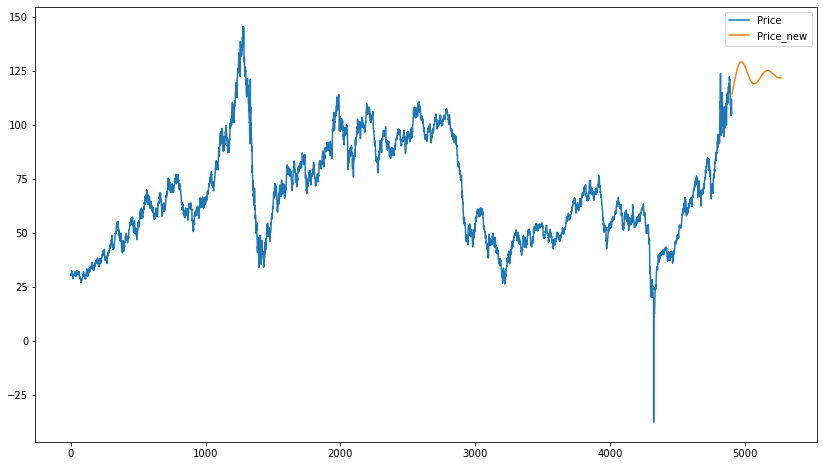

In [50]:
forecasting_plot = full_data[['Price','Price_new']].reset_index(drop=True).plot(figsize=(14,8))
forecasting_plot
plt.show()